<a href="https://colab.research.google.com/github/srinilsukumar/Data-analysis-ML-Projects/blob/main/mnist_dataset_Deeplearning_with_tensorflow%26keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Load MNIST dataset from keras.datasets

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(X_train)

60000

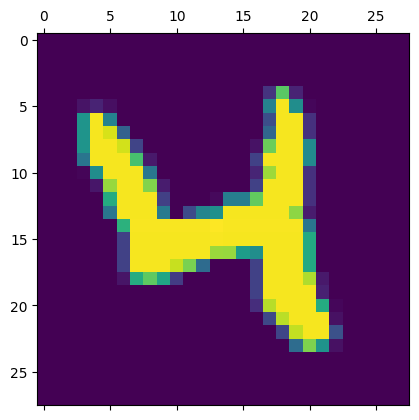

In [4]:
%matplotlib inline
plt.matshow(X_train[20])

In [5]:
X_train.shape

(60000, 28, 28)

## Reshape input data into 1-D array

In [6]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

## Feature Scaling

In [7]:
""" from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train_flattened)
scaler.fit(X_test_flattened) """

' from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nscaler.fit_transform(X_train_flattened)\nscaler.fit(X_test_flattened) '

In [8]:
X_train_flattened=X_train_flattened/255
X_test_flattened=X_test_flattened/255

In [9]:
X_train_flattened.shape

(60000, 784)

## Neural network without Hidden layer

In [10]:
model=keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8117 - loss: 0.7231
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9164 - loss: 0.3045
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9203 - loss: 0.2831
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9238 - loss: 0.2701
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9262 - loss: 0.2639


## Evaluating model performance

In [11]:
model.evaluate(X_train_flattened,y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9293 - loss: 0.2549


[0.2566329538822174, 0.9286166429519653]

In [12]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.3014


[0.2656627297401428, 0.9261000156402588]

In [13]:
y_pred=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
y_predicted_labels=np.array([np.argmax(i) for i in y_pred])
print(y_predicted_labels[100:120])
print(y_test[100:120])

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]


In [15]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    4,   10,    3,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    9,  929,   14,    7,    3,   13,   12,   38,    3],
       [   2,    0,   18,  928,    0,   18,    3,   12,   21,    8],
       [   1,    1,    3,    2,  910,    0,   13,    5,   10,   37],
       [   9,    2,    3,   42,   10,  749,   19,    9,   43,    6],
       [   7,    3,    3,    1,    7,    7,  924,    2,    4,    0],
       [   1,    5,   20,    6,    6,    0,    0,  955,    3,   32],
       [   6,    7,    6,   19,    9,   18,   10,   12,  879,    8],
       [  10,    7,    1,   10,   25,    6,    1,   25,    6,  918]],
      dtype=int32)>

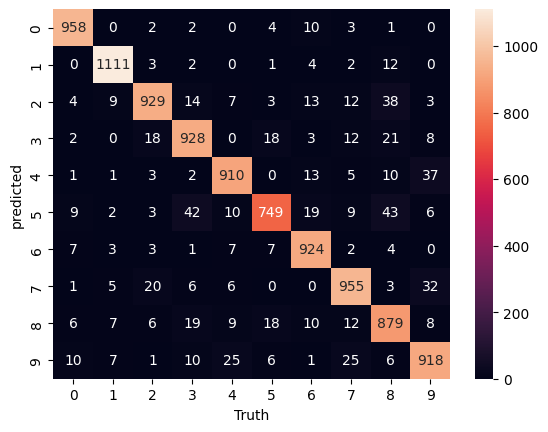

In [48]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Truth')
plt.ylabel('predicted')
plt.show()

## Neural network with Hidden layers

In [20]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8695 - loss: 0.4629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9611 - loss: 0.1307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9800 - loss: 0.0664
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0483


In [21]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.0996


[0.08508113026618958, 0.9751999974250793]

In [22]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
y_predicted[0]

array([1.4878947e-02, 8.5513148e-04, 6.2929049e-02, 8.2183689e-01,
       4.0458408e-06, 1.1887531e-02, 9.5857573e-08, 9.9999511e-01,
       7.2476983e-02, 2.0317496e-01], dtype=float32)

In [39]:
y_predicted_labels=np.array([np.argmax(i) for i in y_predicted])
print('y_predicted \n',y_predicted_labels[:5],'\n y_test\n',
y_test[:5])

y_predicted 
 [7 2 1 0 4] 
 y_test
 [7 2 1 0 4]


In [40]:
cm2=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

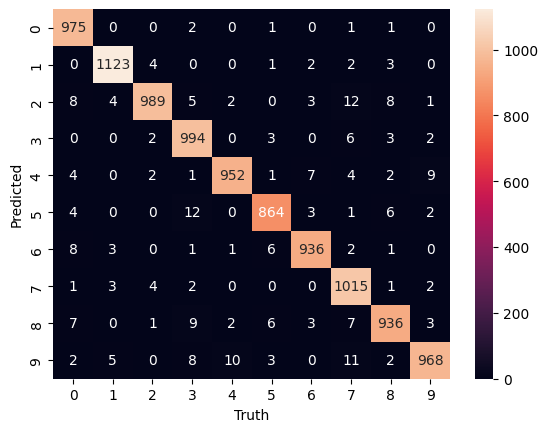

In [47]:
sns.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()
